### Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression

### Get Data
<ol>
    <li> We get the, previously cleansed, <i>train</i> dataset.
</ol>

In [32]:
X = pd.read_hdf('../wip-data/X_train.h5', key = 'df')
y = pd.read_hdf('../wip-data/y_train.h5', key = 'df')

### Learning Curves
<ol>
    <li> We plot learning curves for the <i>train</i> dataset using an unpenalized logistic regression model. This allows us to gain better insight into the bias-variance tradeoff we are likely to encounter in fitting a logistic regression model and better inform our choice of a appropriate model for the given dataset.
</ol>

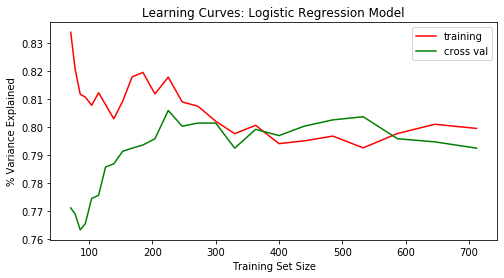

In [33]:
clf_logit = LogisticRegression(max_iter = 10000, penalty = 'none', random_state = 1970)
train_sizes, train_scores, val_scores = learning_curve(clf_logit, X, y, train_sizes = np.logspace(-1, 0, 25),
                                                       shuffle = True, random_state = 1970)

plt.figure(figsize = (8,4))
plt.plot(train_sizes, train_scores.mean(axis = 1), label = 'training', color = 'red')
plt.plot(train_sizes, val_scores.mean(axis = 1), label = 'cross val', color = 'green')
plt.xlabel('Training Set Size')
plt.ylabel('% Variance Explained')
plt.legend()
plt.title('Learning Curves: Logistic Regression Model')
plt.show()

#### Observation
<ol>
    <li> The two learning curves rapidly converge indicating that a Logistic Regression Model using the <i>train</i> dataset is likely to "suffer" from a <i>bias</i> rather than a <i>variance</i> problem.
    <li> The model performance can be improved by either getting more data points (not possible in this case) or increasing the number of features (by developing, say, interaction features) included in the model.
</ol>

### Logistic Regression Models
<ol>
    <li> We use the <i>train-validate</i> strategy to estimate the test error.
    <li> We begin with an unpenalised logistic regression that includes all features. The estimated test set accuracy for this model forms the baseline to compare and contrast the efficacy of other models that we develop.
    <li> For the model developed in the previous step, we recurrsively eliminate features, using cross validation, to select the best set of features.
    <li> We ascertain if the reduced set of features does indeed produce a model with better estimated test set accuracye than the baseline.
</ol>

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1970)

est_test_acc = clf_logit.fit(X_train, y_train).score(X_val, y_val)*100 

print("The estimated test set accuracy for the unpenalized logistic regression model = %f" % est_test_acc,"%")

from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = clf_logit, step = 1, cv = 5, scoring = 'accuracy').fit(X_train, y_train)
est_test_acc = rfecv.score(X_val, y_val)*100

print("Of the %d features, the optimal number of features to include in the model is %d" 
      % (len(X.columns.values), rfecv.n_features_))
print("The estimated test set accuracy for the model with reduced set of features = %f" % est_test_acc,"%")
print("The features to be eliminated are %s" % X.columns.values[rfecv.get_support() == False] )

The estimated test set accuracy for the unpenalized logistic regression model = 73.743017 %
Of the 14 features, the optimal number of features to include in the model is 13
The estimated test set accuracy for the model with reduced set of features = 73.743017 %
The features to be eliminated are ['Fare']


#### Observations
<ol>
    <li>The estimated test set accuracy for the model with reduced set of features remains exactly the same as the baseline and this indicates we can eliminate the identified feature without any adverse impact.
    <li> Recall that the learning curves indicate that the quality of a regression model would improve with either additional data or additional features.
    <li> We introduce new features by adding polynomial and interaction features, built from the original features in the dataset, and use this enhanced feature set to build a new logistic regression model.
    <li> Adding new features is likely to dramatically increase the number of features and we will use both L1 penalty and L2 penalty to regularize the regression models.
    <li> We will ascertain if the models with additional (regularized) features improve on the baseline estimated test error.
 </ol>

In [35]:
X_train = X_train.drop('Fare', axis = 1)
X_val = X_val.drop('Fare', axis = 1)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_feat = PolynomialFeatures()
clf_logit_ridge = LogisticRegression(max_iter = 10000, penalty = 'l2', random_state = 1970)
clf_logit_lasso = LogisticRegression(max_iter = 10000, penalty = 'l1', random_state = 1970, solver = 'liblinear')

pipe_ridge = make_pipeline(poly_feat, clf_logit_ridge)
pipe_ridge.fit(X_train, y_train)
est_test_acc = pipe_ridge.score(X_val, y_val)*100
print("The estimated test set accuracy for a logistic model with polynomial and interaction features but Ridge regularized = %f" % est_test_acc,"%")

pipe_lasso = make_pipeline(poly_feat, clf_logit_lasso)
pipe_lasso.fit(X_train, y_train)
est_test_acc = pipe_lasso.score(X_val, y_val)*100
print("The estimated test set accuracy for a logistic model with polynomial and interaction features but Lasso regularized = %f" % est_test_acc,"%")

The estimated test set accuracy for a logistic model with polynomial and interaction features but Ridge regularized = 81.564246 %
The estimated test set accuracy for a logistic model with polynomial and interaction features but Lasso regularized = 81.005587 %


#### Observations
<ol>
    <li> The estimated test set accuracy for both model with polynomial and interaction features is substandially better than the baseline number, with the Ridge penalized model doing slightly better than the Lasso penalized model.
    <li> The Ridge penalized model with polynomial and interactin features represents the best model when using the Logistic Regression algorithm
 </ol>